## Make Regional Masks and Check Them:

In [1]:
%matplotlib inline
import os
import importlib
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import pop_tools 

import util
import shutil

Cannot write to data cache '/glade/p/cesmdata/cseg'. Will not be able to download remote data files. Use environment variable 'CESMDATAROOT' to specify another directory.


In [2]:
#make masks on grid:
grid_name = 'POP_gx1v7'
grid = pop_tools.get_grid(grid_name)

In [3]:
# Set it up:
lat = grid.TLAT
lon = grid.TLONG

In [5]:
rmask = xr.DataArray(np.ones(5), dims='region') * grid.TAREA
rmask[0, :, :] = grid.TAREA.where((lat <= -45) & (grid.REGION_MASK == 1)).fillna(0.) #Southern Ocean
rmask[1, :, :] = grid.TAREA.where((lat <= -45) & ((lon > 295) | (lon <= 55)) & (grid.REGION_MASK == 1)).fillna(0.) # ATLANTIC
rmask[2, :, :] = grid.TAREA.where((lat <= -45) & ((lon > 55) & (lon <= 145)) & (grid.REGION_MASK == 1)).fillna(0.) # INDIAN
rmask[3, :, :] = grid.TAREA.where((lat <= -45) & ((lon > 145) & (lon <= 245)) & (grid.REGION_MASK == 1)).fillna(0.) # WEST PACIFIC
rmask[4, :, :] = grid.TAREA.where((lat <= -45) & ((lon >= 245) & (lon <= 298)) & (grid.REGION_MASK == 1)).fillna(0.) # EAST PACIFIC

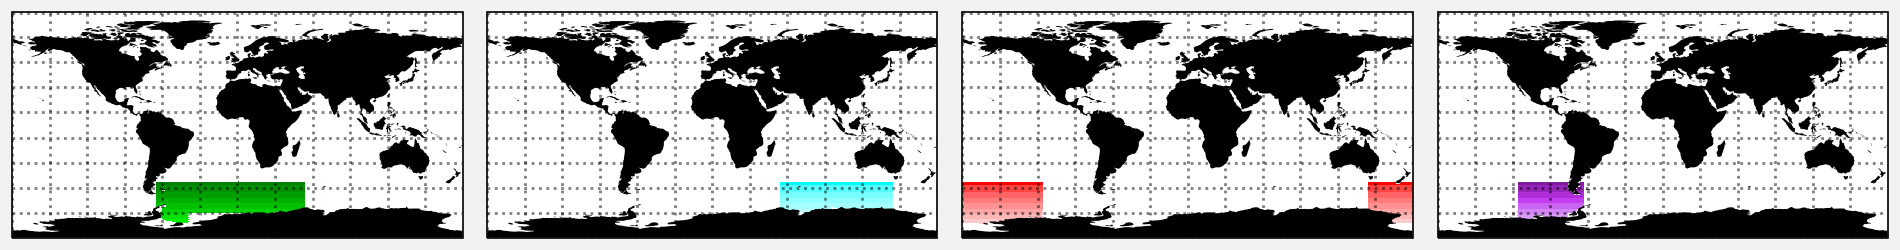

In [6]:
import proplot as plot

f, axs = plot.subplots(ncols=4, proj = 'pcarree')
axs[0].pcolormesh(lon, lat, rmask.isel(region = 1), cmap='green')
axs[1].pcolormesh(lon, lat, rmask.isel(region = 2), cmap='cyan')
axs[2].pcolormesh(lon, lat, rmask.isel(region = 3), cmap='red')
axs[3].pcolormesh(lon, lat, rmask.isel(region = 4), cmap='purple')
axs.format(land = True)

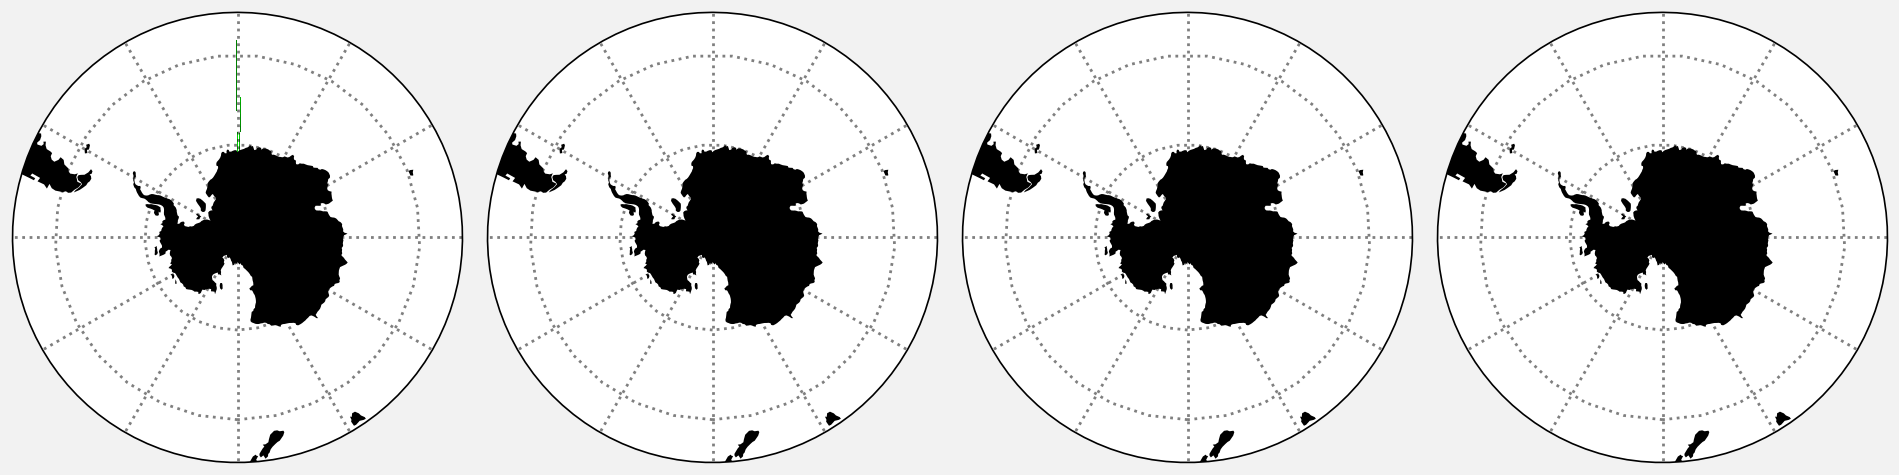

In [9]:
# Using zoom into polar projection example from: 
# https://proplot.readthedocs.io/en/latest/projection.html
f, axs = plot.subplots(ncols=4, proj = 'splaea')

axs[0].pcolormesh(lon, lat, rmask.isel(region = 1), cmap='green')
axs[1].pcolormesh(lon, lat, rmask.isel(region = 2), cmap='cyan')
axs[2].pcolormesh(lon, lat, rmask.isel(region = 3), cmap='red')
axs[3].pcolormesh(lon, lat, rmask.isel(region = 4), cmap='purple')

axs.format(boundinglat=-40, land = True)